<a href="https://colab.research.google.com/github/peterbabulik/synthetic/blob/main/Qi_language_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit qiskit-aer tqdm pandas
!pip install pylatexenc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=ce0916b664e180fb1479fc633c800b9e110d3808770e6e69b160f993f6083ccc
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


 10%|█         | 1/10 [00:08<01:13,  8.17s/it]

Generation 0: Best fitness = 0.5625


100%|██████████| 10/10 [01:23<00:00,  8.30s/it]


No perfect solution found, returning best circuit


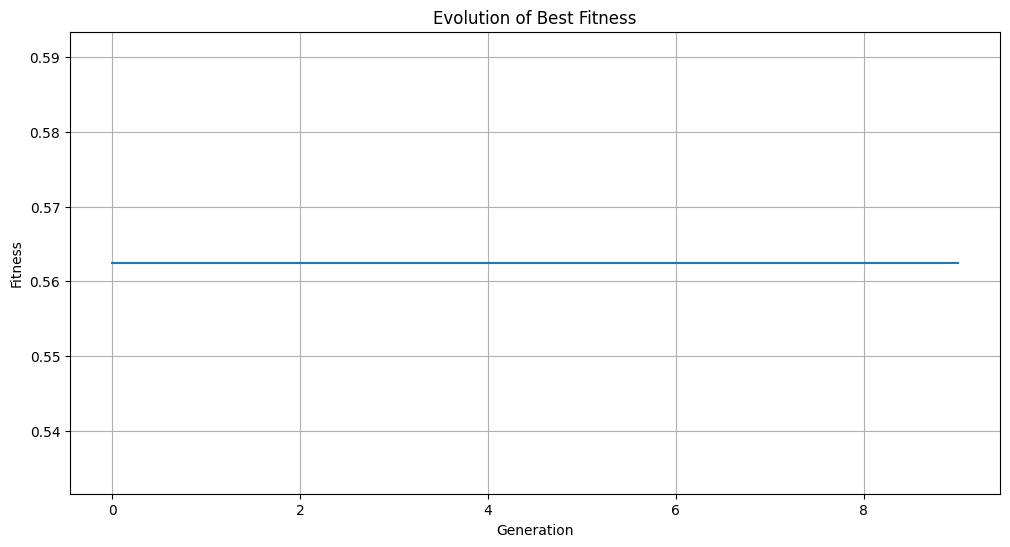

Quantum Circuit Visualization:
                                     ┌────────────┐   ┌─┐      
q_0: ────────────────────────■─────■─┤ Rz(5.4864) ├───┤M├──────
                             │     │ └────┬─┬─────┘   └╥┘      
q_1: ─X──X──■───────X────────┼──■──┼──────┤M├──────────╫───────
      │  │  │       │        │  │  │      └╥┘          ║ ┌─┐   
q_2: ─X──┼──┼───────X────────■──■──■───────╫────────X──╫─┤M├───
         │  │ ┌────────────┐               ║        │  ║ └╥┘┌─┐
q_3: ────X──■─┤ Ry(5.2437) ├───────────────╫────────X──╫──╫─┤M├
              └────────────┘               ║           ║  ║ └╥┘
c: 4/══════════════════════════════════════╩═══════════╩══╩══╩═
                                           1           0  2  3 


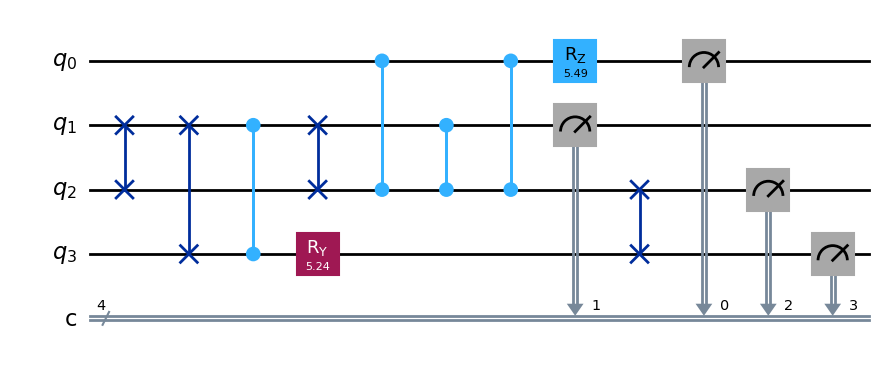


Testing Results:


Inputs,Expected,Accuracy,Correct/Total
"(False, False, False, False)",False,100.00%,1024/1024
"(False, False, False, True)",False,100.00%,1024/1024
"(False, False, True, False)",False,100.00%,1024/1024
"(False, False, True, True)",True,0.00%,0/1024
"(False, True, False, False)",False,100.00%,1024/1024
"(False, True, False, True)",False,100.00%,1024/1024
"(False, True, True, False)",False,100.00%,1024/1024
"(False, True, True, True)",True,0.00%,0/1024
"(True, False, False, False)",False,100.00%,1024/1024
"(True, False, False, True)",False,100.00%,1024/1024



Best quantum circuit details:
Step 1: SWAP on qubits [2, 1], parameters: []
Step 2: SWAP on qubits [1, 3], parameters: []
Step 3: CZ on qubits [1, 3], parameters: []
Step 4: RY on qubits [3], parameters: [5.243709531002336]
Step 5: SWAP on qubits [2, 1], parameters: []
Step 6: CZ on qubits [0, 2], parameters: []
Step 7: CZ on qubits [1, 2], parameters: []
Step 8: CZ on qubits [2, 0], parameters: []
Step 9: SWAP on qubits [2, 3], parameters: []
Step 10: RZ on qubits [0], parameters: [5.486439938847424]


In [5]:

# Import necessary libraries
import numpy as np
import random
from typing import List, Tuple, Dict, Callable
import matplotlib.pyplot as plt
import itertools
from tqdm import tqdm
import pandas as pd
from IPython.display import display, HTML


# Qiskit imports
from qiskit import QuantumCircuit as QiskitCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
from qiskit.circuit import Parameter
# Import execute from the correct module
from qiskit import transpile  # Import transpile for circuit transpilation

def execute(circuits, backend, shots=1024):
    """
    Wrapper function for execute to handle changes in Qiskit versions.
    """
    circuits = transpile(circuits, backend)  # Transpile the circuit for the target backend
    return backend.run(circuits, shots=shots)

class QuantumOperation:
    def __init__(self, operation_type: str, qubits: List[int], parameters: List[float] = None):
        self.operation_type = operation_type
        self.qubits = qubits
        self.parameters = parameters or []

    def apply_to_circuit(self, circuit: QiskitCircuit):
        if self.operation_type == "H":
            circuit.h(self.qubits[0])
        elif self.operation_type == "CNOT":
            circuit.cx(self.qubits[0], self.qubits[1])
        elif self.operation_type == "CZ":
            circuit.cz(self.qubits[0], self.qubits[1])
        elif self.operation_type == "SWAP":
            circuit.swap(self.qubits[0], self.qubits[1])
        elif self.operation_type == "RX":
            circuit.rx(self.parameters[0], self.qubits[0])
        elif self.operation_type == "RY":
            circuit.ry(self.parameters[0], self.qubits[0])
        elif self.operation_type == "RZ":
            circuit.rz(self.parameters[0], self.qubits[0])
        elif self.operation_type == "X":
            circuit.x(self.qubits[0])
        elif self.operation_type == "Y":
            circuit.y(self.qubits[0])
        elif self.operation_type == "Z":
            circuit.z(self.qubits[0])

class QuantumCircuit:
    def __init__(self, operations: List[QuantumOperation], num_qubits: int):
        self.operations = operations
        self.num_qubits = num_qubits
        self.fitness = 0.0

    def to_qiskit_circuit(self):
        qr = QuantumRegister(self.num_qubits, 'q')
        cr = ClassicalRegister(self.num_qubits, 'c')
        circuit = QiskitCircuit(qr, cr)

        for op in self.operations:
            op.apply_to_circuit(circuit)

        circuit.measure(range(self.num_qubits), range(self.num_qubits))
        return circuit

class ImprovedQuantumSyntheticAI:
    def __init__(self, population_size: int = 44, mutation_rate: float = 0.9):
        self.population_size = population_size
        self.mutation_rate = mutation_rate
        self.available_operations = ["H", "CNOT", "CZ", "SWAP", "RX", "RY", "RZ", "X", "Y", "Z"]
        self.single_qubit_ops = ["H", "RX", "RY", "RZ", "X", "Y", "Z"]
        self.two_qubit_ops = ["CNOT", "CZ", "SWAP"]
        self.simulator = Aer.get_backend('qasm_simulator')

    def generate_random_circuit(self, num_operations: int, num_qubits: int) -> QuantumCircuit:
        operations = []

        for _ in range(num_operations):
            if random.random() < 0.7:  # 70% chance for two-qubit operation
                op_type = random.choice(self.two_qubit_ops)
                q1, q2 = random.sample(range(num_qubits), 2)
                op_qubits = [q1, q2]
                parameters = None
            else:
                op_type = random.choice(self.single_qubit_ops)
                q = random.randint(0, num_qubits - 1)
                op_qubits = [q]
                parameters = [random.uniform(0, 2 * np.pi)] if op_type in ["RX", "RY", "RZ"] else None

            operations.append(QuantumOperation(op_type, op_qubits, parameters))

        return QuantumCircuit(operations, num_qubits)

    def mutate_circuit(self, circuit: QuantumCircuit) -> QuantumCircuit:
        new_operations = []
        for op in circuit.operations:
            if random.random() < self.mutation_rate:
                if random.random() < 0.7:
                    new_op_type = random.choice(self.two_qubit_ops)
                    new_qubits = random.sample(range(circuit.num_qubits), 2)
                    parameters = None
                else:
                    new_op_type = random.choice(self.single_qubit_ops)
                    new_qubits = [random.randint(0, circuit.num_qubits - 1)]
                    parameters = [random.uniform(0, 2 * np.pi)] if new_op_type in ["RX", "RY", "RZ"] else None
                new_operations.append(QuantumOperation(new_op_type, new_qubits, parameters))
            else:
                if op.operation_type in ["RX", "RY", "RZ"]:
                    new_param = op.parameters[0] + random.gauss(0, 0.1)
                    new_operations.append(QuantumOperation(op.operation_type, op.qubits, [new_param]))
                else:
                    new_operations.append(op)
        return QuantumCircuit(new_operations, circuit.num_qubits)

    def crossover(self, parent1: QuantumCircuit, parent2: QuantumCircuit) -> QuantumCircuit:
        crossover_points = sorted(random.sample(range(len(parent1.operations)), 2))
        child_operations = (
            parent1.operations[:crossover_points[0]] +
            parent2.operations[crossover_points[0]:crossover_points[1]] +
            parent1.operations[crossover_points[1]:]
        )
        return QuantumCircuit(child_operations, parent1.num_qubits)

    def evaluate_circuit(self, circuit: QuantumCircuit, shots=1024) -> np.ndarray:
        qiskit_circuit = circuit.to_qiskit_circuit()
        job = execute(qiskit_circuit, self.simulator, shots=shots)
        result = job.result().get_counts()

        measurements = np.zeros((shots, circuit.num_qubits), dtype=bool)
        idx = 0
        for bitstring, count in result.items():
            bits = [int(b) for b in reversed(bitstring)]  # Reverse bitstring to match qubit order
            for _ in range(count):
                measurements[idx] = bits
                idx += 1

        return measurements

    def results_to_bool_list(self, results: np.ndarray) -> List[List[bool]]:
        return [list(map(bool, result)) for result in results]

    def calculate_fitness(self, expected_outputs: List[bool], actual_outputs: List[List[bool]]) -> float:
        total_correct = 0
        total_tests = len(expected_outputs) * len(actual_outputs)

        for expected in expected_outputs:
            matches = sum(1 for actual in actual_outputs if actual[-1] == expected)
            total_correct += matches

        return total_correct / total_tests

    def evolve_circuit(self, target_function: Callable, generations: int = 200,
                      num_operations: int = 20, num_qubits: int = 4):
        def fitness(circuit):
            all_inputs = list(itertools.product([False, True], repeat=num_qubits))
            expected_outputs = [target_function(inputs) for inputs in all_inputs]

            results = self.evaluate_circuit(circuit)
            actual_outputs = self.results_to_bool_list(results)

            return self.calculate_fitness(expected_outputs, actual_outputs)

        population = [self.generate_random_circuit(num_operations, num_qubits)
                     for _ in range(self.population_size)]

        best_fitnesses = []
        best_circuit = None
        best_fitness = 0

        for generation in tqdm(range(generations)):
            for circuit in population:
                circuit.fitness = fitness(circuit)
                if circuit.fitness > best_fitness:
                    best_fitness = circuit.fitness
                    best_circuit = circuit

            population.sort(key=lambda x: x.fitness, reverse=True)
            current_best = population[0]
            best_fitnesses.append(current_best.fitness)

            if current_best.fitness >= 0.99:
                print(f"Near-perfect solution found in generation {generation}")
                self.plot_fitness_evolution(best_fitnesses)
                return current_best

            elite_size = max(1, self.population_size // 10)
            new_population = population[:elite_size]

            while len(new_population) < self.population_size:
                tournament = random.sample(population, min(5, len(population)))
                parent1 = max(tournament, key=lambda x: x.fitness)
                tournament = random.sample(population, min(5, len(population)))
                parent2 = max(tournament, key=lambda x: x.fitness)

                child = self.crossover(parent1, parent2)
                child = self.mutate_circuit(child)
                new_population.append(child)

            population = new_population

            if generation % 10 == 0:
                print(f"Generation {generation}: Best fitness = {current_best.fitness}")

        print("No perfect solution found, returning best circuit")
        self.plot_fitness_evolution(best_fitnesses)
        return best_circuit

    def plot_fitness_evolution(self, fitnesses):
        plt.figure(figsize=(12, 6))
        plt.plot(fitnesses)
        plt.title('Evolution of Best Fitness')
        plt.xlabel('Generation')
        plt.ylabel('Fitness')
        plt.grid(True)
        plt.show()

    def visualize_circuit(self, circuit):
        qiskit_circuit = circuit.to_qiskit_circuit()
        print("Quantum Circuit Visualization:")
        print(qiskit_circuit)
        display(qiskit_circuit.draw(output='mpl'))

    def test_circuit(self, circuit, target_function):
        all_inputs = list(itertools.product([False, True], repeat=circuit.num_qubits))
        results = self.evaluate_circuit(circuit)
        actual_outputs = self.results_to_bool_list(results)

        test_results = []
        for inputs in all_inputs:
            expected = target_function(inputs)
            actuals = [output[-1] for output in actual_outputs]
            correct_count = sum(1 for actual in actuals if actual == expected)
            accuracy = correct_count / len(actuals)

            test_results.append({
                'Inputs': inputs,
                'Expected': expected,
                'Accuracy': f"{accuracy:.2%}",
                'Correct/Total': f"{correct_count}/{len(actuals)}"
            })

        df = pd.DataFrame(test_results)
        display(HTML(df.to_html(index=False)))
        return test_results

# Example usage and testing
def target_function(inputs):
    return (inputs[0] and inputs[1]) or (inputs[2] and inputs[3])

# Create and evolve the quantum circuit
quantum_ai = ImprovedQuantumSyntheticAI(population_size=100)
best_circuit = quantum_ai.evolve_circuit(
    target_function,
    generations=10,
    num_operations=10,
    num_qubits=4
)

# Visualize the best circuit
quantum_ai.visualize_circuit(best_circuit)

# Test the best circuit
print("\nTesting Results:")
test_results = quantum_ai.test_circuit(best_circuit, target_function)

print("\nBest quantum circuit details:")
for i, op in enumerate(best_circuit.operations):
    print(f"Step {i+1}: {op.operation_type} on qubits {op.qubits}, parameters: {op.parameters}")